In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
import random

#from api_keys import api_key

#url = f"https://api.nal.usda.gov/ndb/reports/?"


In [2]:
#Creación del formulario para el usuario

user_dict = {
    "First_Name":'',
    "Last_Name": '',
    "Age":'',
    "Sex":'',
    "Weight_in_Kilograms":'',
    "Height_in_meters":''
    }



for key in user_dict:
    user_dict[key] = str(input(f"Please type your {key} "))

activitie = str(input(f"Please type your type of activitie you have: Sedentary (S), Low Active (L), Active (A) or Very Active (V) "))

if user_dict["Sex"] == "Women":
    pregnant_q = str(input(f"Please type if you are pregnant Yes(Y)/ No(N) (Only the letter) "))
else:
    pregnant_q = "N/A"

if pregnant_q == "Y":
    pregnant_a = int(input(f"In wich trimester of pregnancy are you (Only the number) ? "))
else:
    pregnant_a = "N/A"
    
if user_dict["Sex"] == "Women":
    lactation_q = str(input(f"Please type if you are in lactation Yes(Y)/ No(N) (Only the letter)"))
else:
    lactation_q = "N/A"

if lactation_q == "Y":
    lactation_a = int(input(f"Please type if you are inside the 1st or 2nd Semester of lactation (Only put the number) "))
else:
    lactation_a = "N/A"

Please type your First_Name Alejandro
Please type your Last_Name Dorantes
Please type your Age 26
Please type your Sex Men
Please type your Weight_in_Kilograms 77
Please type your Height_in_meters 1.77
Please type your type of activitie you have: Sedentary (S), Low Active (L), Active (A) or Very Active (V) S


In [3]:
#Cálculo del IMC actual y el ideal.

IMC_actual = round(float(user_dict["Weight_in_Kilograms"])/(float(user_dict["Height_in_meters"])**2),2)

if (IMC_actual < 24.9 and IMC_actual > 18.5):
    IMC_ideal = IMC_actual    
if IMC_actual > 24.9:
    IMC_ideal = 24.5
if IMC_actual < 18.5:
    IMC_ideal = 19
    
Ideal_Weight = round(IMC_ideal * (float(user_dict["Height_in_meters"])**2),1)

Variance_Weight = round(float(user_dict["Weight_in_Kilograms"]) - float(Ideal_Weight),1)

print("Your ideal weight is: " + str(Ideal_Weight) + "kg")


In [4]:
#Cálculo de la actividad física, para la fórmula de EER

pa_data_df = pd.DataFrame({"Category": ["S", "L", "A", "V"],
                          "Men": [1,1.11,1.25,1.48],
                          "Woman": [1,1.12,1.27,1.45]})

pa_data_df = pa_data_df.set_index("Category")

if user_dict["Sex"] == "Men":
    P_Activitie = pa_data_df.loc[activitie,"Men"]
else:
    P_Activitie = pa_data_df.loc[activitie,"Woman"]


#Cálculo del requerimiento de energía diario de una persona.

EER_Men= float(662) - (9.53 * float(user_dict["Age"]))+ float(P_Activitie) *((15.91*float(Ideal_Weight)) + (539.6*float(user_dict["Height_in_meters"]))) 
EER_Women= float(354) - (6.91 * float(user_dict["Age"]))+ float(P_Activitie) *((9.36*float(Ideal_Weight)) + (float(726)*float(user_dict["Height_in_meters"])))

    
if user_dict["Sex"] == "Men":
    Nut_Req_Atnow = round(EER_Men,)
else:
    Nut_Req_Atnow = round(EER_Women,)
    if pregnant_q == "Y":
        if pregnant_a == 1:
            Nut_Req_Atnow = Nut_Req_Atnow
        if pregnant_a == 2:
            Nut_Req_Atnow = Nut_Req_Atnow + 340
        if pregnant_a == 3:
            Nut_Req_Atnow = Nut_Req_Atnow + 452
    if lactation_q == "Y":
        if lactation_a == 1:
            Nut_Req_Atnow = Nut_Req_Atnow + 600 - 170
        if lactation_a == 2:
            Nut_Req_Atnow = Nut_Req_Atnow + 400

print("The Kcal you need to consume every day are: " + str(Nut_Req_Atnow))



In [5]:
#Distribución de la energía en carbohidratos, grasas y proteina

Carb_Dist_kcal= round(Nut_Req_Atnow * .50,)
Fat_Dist_kcal= round(Nut_Req_Atnow * .3,)
Protein_Dist_kcal = round(Nut_Req_Atnow * .2,)


In [6]:
#Conversión de Kcal a gramos

Carb_Dist_gr= round(Carb_Dist_kcal / float(4),)
Fat_Dist_gr= round(Fat_Dist_kcal / float(9),)
Protein_Dist_gr = round(Protein_Dist_kcal / float(4),)

print("The nutrients you need every day in grams are: " + str(Carb_Dist_gr) + " carbs, " + str(Fat_Dist_gr) + " fats and " 
      + str(Protein_Dist_gr) " proteins")


In [7]:
#DataFrame con información personal.
User_Information=pd.DataFrame({"Name": user_dict["First_Name"],
                              "Last Name": user_dict["Last_Name"],
                               "Age": user_dict["Age"],
                               "Sex": user_dict["Sex"],
                               "Weight (Kg)": user_dict["Weight_in_Kilograms"],
                               "Height (m)": user_dict["Height_in_meters"],
                               "Pregnant": pregnant_q,
                               "Pregnancy Trimester": pregnant_a,
                               "Lactation": lactation_q,
                               "Lactation Semester": lactation_a,
                               "Actual IMC": IMC_actual,
                               "Ideal IMC": IMC_ideal,
                               "Ideal Weight(Kg)": Ideal_Weight,
                               "Extra/Missing Weight (Kg)": Variance_Weight,
                               "Physical Activitie": activitie,
                               "Energy Requirement (kcal)": Nut_Req_Atnow,
                               "Carbohydrates Req (kcal)": Carb_Dist_kcal,
                               "Fat Req (kcal)": Fat_Dist_kcal,
                               "Protein Req (kcal)": Protein_Dist_kcal,
                               "Carbohydrates Req (gr)": Carb_Dist_gr,
                               "Fat Req (gr)": Fat_Dist_gr,
                               "Protein Req (gr)": Protein_Dist_gr
                              }, index=[0])

pd.options.display.max_columns=22


User_Information

,Name,Last Name,Age,Sex,Weight (Kg),Height (m),Pregnant,Pregnancy Trimester,Lactation,Lactation Semester,Actual IMC,Ideal IMC,Ideal Weight(Kg),Extra/Missing Weight (Kg),Physical Activitie,Energy Requirement (kcal),Carbohydrates Req (kcal),Fat Req (kcal),Protein Req (kcal),Carbohydrates Req (gr),Fat Req (gr),Protein Req (gr)
0,Alejandro,Dorantes,26,Men,77,1.77,N/A,N/A,N/A,N/A,24.58,24.58,77.0,0.0,S,2594,1297,778,519,324,86,130


In [8]:
# Leer el CSV

nutrients_data = 'Resources/Nutrients.csv'
nutrientsdf = pd.read_csv(nutrients_data, encoding="ISO-8859-1")


In [9]:
# Base de Nutrientes solo con Proteínas, Carbohidratos y Grasas

nutrients_loc=nutrientsdf.loc[nutrientsdf["Nutrient_Code"].isin([203,204,205])] 

In [10]:
# Leer el CSV de Productos

products_data = 'Resources/Products.csv'
productsdf = pd.read_csv(products_data, encoding="ISO-8859-1")


C:\Users\AlejandroDorantes\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
# Obtener 25 alimentos aleatorios que se consumen en un día, y con los calculos de consumo por macronutrimento en gr 
Fats_Month=[]
Carbs_Month=[]
Proteins_Month=[]
Days=range(1,31)

for days in Days:
    
    selected_products = productsdf.sample(n=12)
    products_nutrients = selected_products.loc[:,["NDB_Number", "long_name"]]
    products_index = products_nutrients["NDB_Number"].unique()
    nutrients_sample=nutrients_loc.loc[nutrients_loc["NDB_No"].isin(products_index)]
    nutrients_proteins = nutrients_sample.loc[nutrients_sample["Nutrient_Code"] == 203]
    proteins = nutrients_proteins.loc[:,["NDB_No", "Output_value"]]
    proteins = proteins.rename(columns = {"NDB_No": "NDB_Number"})
    nutrients_fats = nutrients_sample.loc[nutrients_sample["Nutrient_Code"] == 204]
    fats = nutrients_fats.loc[:,["NDB_No", "Output_value"]]
    fats = fats.rename(columns = {"NDB_No": "NDB_Number"})
    nutrients_carbs = nutrients_sample.loc[nutrients_sample["Nutrient_Code"] == 205]
    carbs = nutrients_carbs.loc[:,["NDB_No", "Output_value"]]
    carbs = carbs.rename(columns = {"NDB_No": "NDB_Number"})
    products_nutrients = pd.merge(products_nutrients, proteins, on = "NDB_Number")
    products_nutrients = products_nutrients.rename(columns = {"Output_value": "Proteins (gr)"})
    products_nutrients = pd.merge(products_nutrients, fats, on = "NDB_Number")
    products_nutrients = products_nutrients.rename(columns = {"Output_value": "Total Lipid (fat) (gr)"})
    products_nutrients = pd.merge(products_nutrients, carbs, on = "NDB_Number")
    products_nutrients = products_nutrients.rename(columns = {"Output_value": "Carbohydrate (gr)"})
    total_protein = sum(products_nutrients["Proteins (gr)"])
    total_fats = sum(products_nutrients["Total Lipid (fat) (gr)"])
    total_carbs = sum(products_nutrients["Carbohydrate (gr)"])
    Fats_Month.append(total_fats)
    Carbs_Month.append(total_carbs)
    Proteins_Month.append(total_protein)
    
Monthly_Result=pd.DataFrame({"Days": Days,
                            "Carbohydrates Consumed (gr)": Carbs_Month,
                            "Fats Consumed (gr)": Fats_Month,
                            "Proteins Consumed (gr)": Proteins_Month})


    
    
Monthly_Result


,Days,Carbohydrates Consumed (gr),Fats Consumed (gr),Proteins Consumed (gr)
0,1,604.45,112.46,84.92
1,2,270.26,117.31,69.73
2,3,402.89,288.53,86.32
3,4,301.02,355.98,97.60
4,5,248.82,249.41,183.36
5,6,617.90,96.09,111.95
6,7,498.19,108.59,139.36
7,8,448.38,231.52,103.42
8,9,282.14,166.40,64.80
9,10,359.60,90.86,69.25


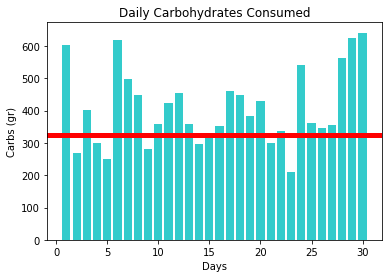

In [12]:
# Gráfica para Carbohidratos

plt.bar(Days, Carbs_Month, color='c', alpha=0.8, align ="center")
plt.title("Daily Carbohydrates Consumed")
plt.xlabel("Days")
plt.ylabel("Carbs (gr)")
plt.axhline(y=Carb_Dist_gr, color = "r", linestyle = "-", linewidth = 5)
plt.savefig("Daily Carbs")
plt.show()



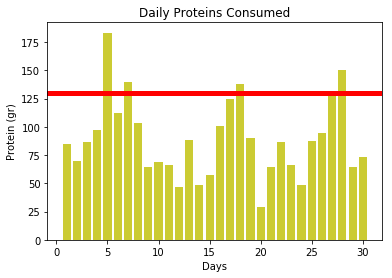

In [13]:
# Gráfica para Proteínas

plt.bar(Days, Proteins_Month, color='y', alpha=0.8, align ="center")
plt.title("Daily Proteins Consumed")
plt.xlabel("Days")
plt.ylabel("Protein (gr)")
plt.axhline(y=Protein_Dist_gr, color = "r", linestyle = "-", linewidth = 5)
plt.savefig("Daily Proteins")
plt.show()

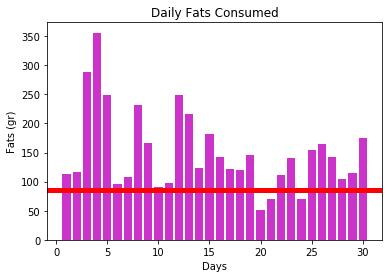

In [14]:
# Grafica para Grasas

plt.bar(Days, Fats_Month, color='m', alpha=0.8, align ="center")
plt.title("Daily Fats Consumed")
plt.xlabel("Days")
plt.ylabel("Fats (gr)")
plt.axhline(y=Fat_Dist_gr, color = "r", linestyle = "-", linewidth = 5)
plt.savefig("Daily Fats")
plt.show()

In [15]:
#Conversión de gramos a Kcal de lo consumido

# Promedio de los nutrientes consumidos en un mes
avg_carbs = Monthly_Result["Carbohydrates Consumed (gr)"].mean()
avg_proteins = Monthly_Result["Proteins Consumed (gr)"].mean()
avg_fats = Monthly_Result["Fats Consumed (gr)"].mean()

Carb_Kcal_Consumed =round(avg_carbs*float(4),)
Fat_Kcal_Consumed = round(avg_fats*float(9),)
Protein_Kcal_Consumed = round(avg_proteins*float(4),)

print("The Kcal you consumed in a month are:")
print(str(Carb_Kcal_Consumed) + " of carbs")
print(str(Fat_Kcal_Consumed) + " of fats")
print(str(Protein_Kcal_Consumed) + " of proteins")


1632
1354
356


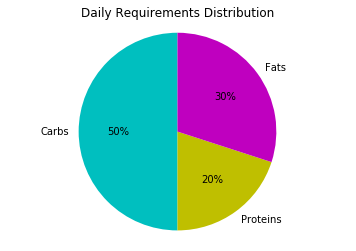

In [16]:
# Gráfica de pie de la ingesta necesaria

labels = ["Carbs", "Proteins", "Fats"]
requirements = [Carb_Dist_kcal, Protein_Dist_kcal, Fat_Dist_kcal]
colors = ["c", "y", "m"]
plt.pie(requirements, labels = labels, colors=colors, autopct = "%1.f%%", startangle = 90)
plt.title("Daily Requirements Distribution")
plt.axis("equal")

plt.savefig("Daily Requirements Distribution")
plt.show()

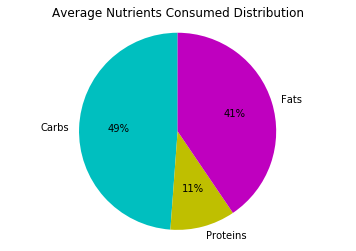

In [17]:
#Gráfica de pastel para saber la distribución del consumo.
labels = ["Carbs", "Proteins", "Fats"]
requirements = [Carb_Kcal_Consumed,Protein_Kcal_Consumed,Fat_Kcal_Consumed]
colors = ["c", "y", "m"]
plt.pie(requirements, labels = labels, colors=colors, autopct = "%1.f%%", startangle = 90)
plt.title("Average Nutrients Consumed Distribution")
plt.axis("equal")
plt.savefig("Average Nutrients Consumed Distribution")
plt.show()

In [18]:
# Calculo de Kcal consumidas, y la diferencia entre las requeridas para sacar el incremento o disminución de peso

kg_Fat= 7700

Nut_Consumed_Atnow = Carb_Kcal_Consumed + Fat_Kcal_Consumed + Protein_Kcal_Consumed

Days_count= Monthly_Result["Days"].count()
Diferencia=round((Nut_Consumed_Atnow-Nut_Req_Atnow),1)
Body_Fat = round(((Nut_Consumed_Atnow-Nut_Req_Atnow)*Days_count)/ kg_Fat,1)

Days_count
print(f"Kcal Consumidas: {Nut_Consumed_Atnow} kcal")
print(f"Kcal Requeridas: {Nut_Req_Atnow} kcal")
print(f"Diferencia de Kcal: {Diferencia} kcal")
print(F"Incremento de peso: {Body_Fat} kg")


Kcal Consumidas: 3342 kcal
Kcal Requeridas: 2594 kcal
Diferencia de Kcal: 748 kcal
Incremento de peso: 2.9 kg


In [19]:
#Conversión de gr a kcal consumidas
Carb_Kcal_Consumed_Daily = (round(Monthly_Result["Carbohydrates Consumed (gr)"]*float(4),))
Fat_Kcal_Consumed_Daily= (round(Monthly_Result["Fats Consumed (gr)"]*float(9),))
Protein_Kcal_Consumed_Daily= (round(Monthly_Result["Proteins Consumed (gr)"]*float(4),))

#DataFrame de Kcal consumidas por distribución y su total diario.

Monthly_Result["Corboydrates Consumed (kcal)"]=Carb_Kcal_Consumed_Daily
Monthly_Result["Fats Consumed (kcal)"]=Fat_Kcal_Consumed_Daily
Monthly_Result["Proteins Consumed (kcal)"]=Protein_Kcal_Consumed_Daily
Monthly_Result["Total Consumed (kcal)"]=Monthly_Result["Corboydrates Consumed (kcal)"] + Monthly_Result["Fats Consumed (kcal)"] + Monthly_Result["Proteins Consumed (kcal)"]


In [33]:
#Tabla para representar la acumulación de kcal y el incremento/disminución de la grasa corporal.

Acumulated=round((Monthly_Result["Total Consumed (kcal)"] - Nut_Req_Atnow),) 

Variance_Acumulated=Acumulated.cumsum()

Monthly_Result["Energy Requirement (kcal)"]= round(Nut_Req_Atnow,)
Monthly_Result["Kcal Variance"]= round(Acumulated,)
Monthly_Result["Kcal Accumulated"]=round(Variance_Acumulated,)

Monthly_Result["Body Fat Loss/Gain (Kg)"]= round(Monthly_Result["Kcal Accumulated"] / 7700 ,)

Monthly_Result.to_csv("User Results.csv", index=False)

Monthly_Result


,Days,Carbohydrates Consumed (gr),Fats Consumed (gr),Proteins Consumed (gr),Corboydrates Consumed (kcal),Fats Consumed (kcal),Proteins Consumed (kcal),Total Consumed (kcal),Energy Requirement (kcal),Kcal Variance,Kcal Accumulated,Body Fat Loss/Gain (Kg)
0,1,604.45,112.46,84.92,2418.0,1012.0,340.0,3770.0,2594,1176.0,1176.0,0.0
1,2,270.26,117.31,69.73,1081.0,1056.0,279.0,2416.0,2594,-178.0,998.0,0.0
2,3,402.89,288.53,86.32,1612.0,2597.0,345.0,4554.0,2594,1960.0,2958.0,0.0
3,4,301.02,355.98,97.60,1204.0,3204.0,390.0,4798.0,2594,2204.0,5162.0,1.0
4,5,248.82,249.41,183.36,995.0,2245.0,733.0,3973.0,2594,1379.0,6541.0,1.0
5,6,617.90,96.09,111.95,2472.0,865.0,448.0,3785.0,2594,1191.0,7732.0,1.0
6,7,498.19,108.59,139.36,1993.0,977.0,557.0,3527.0,2594,933.0,8665.0,1.0
7,8,448.38,231.52,103.42,1794.0,2084.0,414.0,4292.0,2594,1698.0,10363.0,1.0
8,9,282.14,166.40,64.80,1129.0,1498.0,259.0,2886.0,2594,292.0,10655.0,1.0
9,10,359.60,90.86,69.25,1438.0,818.0,277.0,2533.0,2594,-61.0,10594.0,1.0


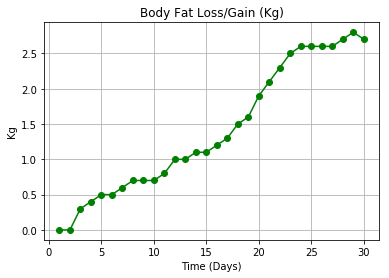

In [175]:
#Grafica de incremento o disminución de grasa corporal.
plt.plot(Monthly_Result["Days"], Monthly_Result["Body Fat Loss/Gain (Kg)"], marker = "o", color='green')

plt.grid(True)
plt.title('Body Fat Loss/Gain (Kg)')
plt.xlabel('Time (Days)')
plt.ylabel('Kg')
plt.savefig("Body Fat Loss-Gain (Kg).png")
                                               
plt.show()